<a href="https://colab.research.google.com/github/riyagpt0251/Star-classification/blob/main/StarClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


load the dataset

In [2]:
# Load the dataset
file_path = "6 class csv.csv"  # Replace with your file path
df = pd.read_csv(file_path)

# Display the first few rows
print(df.head())


   Temperature (K)  Luminosity(L/Lo)  Radius(R/Ro)  Absolute magnitude(Mv)  \
0             3068          0.002400        0.1700                   16.12   
1             3042          0.000500        0.1542                   16.60   
2             2600          0.000300        0.1020                   18.70   
3             2800          0.000200        0.1600                   16.65   
4             1939          0.000138        0.1030                   20.06   

   Star type Star color Spectral Class  
0          0        Red              M  
1          0        Red              M  
2          0        Red              M  
3          0        Red              M  
4          0        Red              M  


Data preprocessing

In [6]:
# Check for missing values
print(df.isnull().sum())

# Encode categorical columns (Star Color and Spectral Class)
label_encoder_color = LabelEncoder()
label_encoder_class = LabelEncoder()

df['Star color'] = label_encoder_color.fit_transform(df['Star color'])
df['Spectral Class'] = label_encoder_class.fit_transform(df['Spectral Class'])

# Separate features (X) and target (y)
X = df[['Temperature (K)', 'Luminosity(L/Lo)', 'Radius(R/Ro)', 'Absolute magnitude(Mv)',
        'Star color', 'Spectral Class']]
y = df['Star type']

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


Temperature (K)           0
Luminosity(L/Lo)          0
Radius(R/Ro)              0
Absolute magnitude(Mv)    0
Star type                 0
Star color                0
Spectral Class            0
dtype: int64


Split the data

In [7]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


Train the model

In [8]:
# Train a Random Forest Classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)


Evaluate the model

Accuracy: 100.00%
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       1.00      1.00      1.00         7
           2       1.00      1.00      1.00         6
           3       1.00      1.00      1.00         8
           4       1.00      1.00      1.00         8
           5       1.00      1.00      1.00        11

    accuracy                           1.00        48
   macro avg       1.00      1.00      1.00        48
weighted avg       1.00      1.00      1.00        48



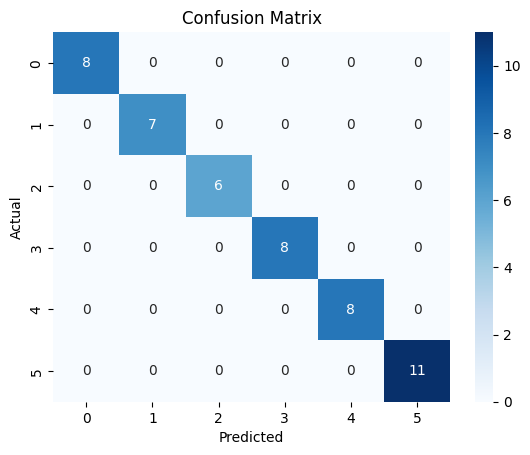

In [9]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Visualize confusion matrix
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


Save the model

In [10]:
import pickle

# Save the model and label encoders
pickle.dump(model, open("star_classifier.pkl", "wb"))
pickle.dump(label_encoder_color, open("label_encoder_color.pkl", "wb"))
pickle.dump(label_encoder_class, open("label_encoder_class.pkl", "wb"))


predict with a new star

In [17]:
print("Star Color Classes:", loaded_color_encoder.classes_)
print("Spectral Class Classes:", loaded_class_encoder.classes_)


Star Color Classes: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18]
Spectral Class Classes: [0 1 2 3 4 5 6]


In [18]:
new_star_color_encoded = 1  # Replace with the correct numeric value for 'red'
new_star_class_encoded = 5  # Replace with the correct numeric value for 'M'


In [19]:
# Example: Numeric input values directly (encoded)
new_star_color_encoded = 1  # Replace with the numeric value for the desired color
new_star_class_encoded = 5  # Replace with the numeric value for the desired spectral class

# Define star features
new_star = [[3000, 0.002, 0.15, 16, new_star_color_encoded, new_star_class_encoded]]

# Scale the input
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
new_star_scaled = scaler.fit_transform(new_star)

# Predict star type
star_type_prediction = loaded_model.predict(new_star_scaled)
print(f"Predicted Star Type: {star_type_prediction[0]}")


Predicted Star Type: 4


In [22]:
star_color_mapping = {'red': 1, 'blue': 2, 'yellow': 3}  # Example mappings
spectral_class_mapping = {'M': 5, 'G': 3, 'K': 4}  # Example mappings

new_star_color_encoded = star_color_mapping['red']
new_star_class_encoded = spectral_class_mapping['M']
